In [1]:
from __future__ import print_function
import sisl
import Hubbard.hamiltonian as hh
import Hubbard.sp2 as sp2
import Hubbard.density as density
import Hubbard.geometry as geometry
import Hubbard.plot as plot
%matplotlib inline

In this example we will study the electrons correlation in a finite molecule, and find the self-consistent solution using the `Hubbard` package.

We will use the molecule of ref. [Nature Communications 10, 200 (2019)](https://www.nature.com/articles/s41467-018-08060-6) and compare the simulation with the experimental system.

You can find the molecular geometry in the file `junction-2-2.XV`.

In the exercises section we will also use the `Hubbard` package to find the converged solution for a system with periodic boundary conditions.

### Getting started:

- We will start by building the tight-binding (TB) Hamiltonian for an sp2 carbon-based molecule, by first reading the geometry file using `sisl`. To build the TB Hamiltonian (which describes the kinetic part of the system's Hamiltonian) we will use the function from the `Hubbard` package `sp2` that builds the TB `sisl.Hamiltonian` of an sp2 carbon system. In particulat, we will use the set of parameters `t1=2.7`,`t2=0.2` and `t3=0.18` eV to model this Hamiltonian.


In [2]:
# Build sisl.Geometry object from the 'XV' file
geom = sisl.get_sile('junction-2-2.XV').read_geometry()

# Build sisl.Hamiltonian object using the sp2 function
Hsp2 = sp2(geom, t1=2.7, t2=0.2, t3=0.18)

- We will build the `HubbardHamiltonian` object, which will allow us to use the routines stored in this class to converge the mean field Hubbard Hamiltonian until we find the self-consistent solution. To model the interaction part (Hubbard term) we will use `U=3.5` eV. You can find the parameters used to build the full Hamiltonian (both the kinetic and interaction parts) in the [Supp. Material](https://www.nature.com/articles/s41467-018-08060-6#Sec12) of the [paper referenced above](https://www.nature.com/articles/s41467-018-08060-6).

Type:

```
help(hh.HubbardHamiltonian)
```
for more information.

In [3]:
# Build the HubbardHamiltonian object with U=3.5 at a temperature of kT~0 in units of the Boltzmann constant
HH = hh.HubbardHamiltonian(Hsp2, U=3.5, kT=1e-5)

##### Important note before we start the convergence process
It is important that we initialize the convergence of the `HubbardHamiltonian` object by giving an initial spin-density that breaks the symmetry between the up- and down- spin channels. Otherwise the code *will not be able to find a solution*.
Furthermore, the closer the initial spin-denisities are from the self-consistent solution, the faster the code will find it.

In [13]:
# Let's initiate with a random density as a starting point
HH.random_density()

# The polarization can be tuned by using the following function to start with a 
# specific up- and down-spin density distribution. In this case we will start by placing one up-spin at the
# atomic postion 77 and one down-spin at position 23
HH.set_polarization([77], dn=[23])

- Now we can start the convergence until we find the self-consistent solution up to a desired tolerance (`tol`) by calling the `hh.HubbardHamiltonian.converge` method. This method needs of another method to tell the code how to build the spin-densities. For instance, to compute the spin-densities for TB Hamiltonians with finite or periodic boundary conditions, one could use the method `density.dm`. 

Type:

```
help(hh.HubbardHamiltonian.converge)
```
and/or

```
help(density.dm)
```

for more information.

In [14]:
# Converge until a tolerance of tol=1e-10
dn = HH.converge(density.dm, tol=1e-10, print_info=True)

   HubbardHamiltonian: converge towards tol=1.00e-10


/home/sofia/anaconda3/lib/python3.8/site-packages/sisl-0.10.0.dev0-py3.8-linux-x86_64.egg/sisl/physics/distribution.py:163: RuntimeWarning: overflow encountered in exp
  return 1. / (exp((E - mu) / kT) + 1.)


   found solution in 36 iterations


##### Understanding the final results
The code will give a total energy that it has obtained for the self-consistent solution. We can save this value to compare it with further calculations.

Also we can visualize some meaningful physical quantities and properties of the solution, e.g. such as the spin polarization. Other interesting electronic properties can be visualized using the `Hubbard.plot` module (take a look at the exercises section below)

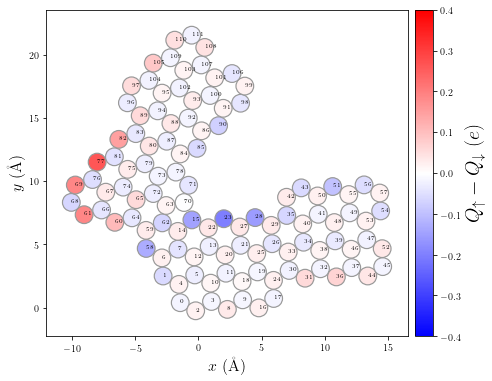

In [15]:
# Save total energy
E_0 =  HH.Etot

# Let's visualize some relevant physical quantities of the final result (this process make take a few seconds):
p = plot.SpinPolarization(HH, colorbar=True, vmax=0.4, vmin=-0.4)
p.annotate()

## Try it yourself

#### Simulation of the singlet-triplet transtition energy

For this first example we will continue with the example from above and will use the `Hubbard` capabilities to perform further simulations.
In absence of specifications, since the molecule has an even number of total electrons, the charge associated to the up- and down-spin channels is equal (`ntot/2`).
Therefore, we have just found the antiferromagnetic solution. 
But we can manipulate and compute the solution for the ferromagnetic case (or other magnetic states), by imposing an imbalance between up- and down-spin components. 

To find the ferromagnetic solution one just have to do:

```
HH.q[0] += 1
HH.q[1] -= 1
```

and converge again.

You can now plot the spin polarization of the ferromagnetic solution and compare with the previous solution.

Now compare the total energies, this will tell you which solution is the ground state.

##### Extra material:
You can go to the [Supp. Material](https://www.nature.com/articles/s41467-018-08060-6#Sec12) of the [referenced paper above](https://www.nature.com/articles/s41467-018-08060-6), and try to reproduce other results, e.g. such as the singlet triplet transition curve as a function of the Coulomb parameter `U`, the waefunctions for each spin-channel, etc.